
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395 Taller 2 </h1>

<H2 align='center'> Máxima Inverosimilitud </H2>
<H4 align='center'> Matías Carvajal </H3>
<H4 align='center'> Vicente Robles </H3>
<H4 align='center'> Félix Vergara </H3>

<hr style="height:2px;border:none"/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# Declaración de principios

Nosotros, integrantes de Máxima inverosimilitud, declaramos no haber incursado en ningún tipo de falta al código del estudiante, al no haber copiado ningún tipo de material. Todo trabajo fue realizado por nuestro propio esfuerzo e investigación, con uso de recursos citados.
  
Matías Carvajal: Participación en el pre-procesamiento de los datos, muestreo y discusión de los resultados. 

Vicente Robles:   

Félix Vergara: Participación activa en codigo de la hipótesis y desafío.

Link datasets: https://archive.ics.uci.edu/ml/datasets/wine+quality

#Marco Teórico

En modelos de regresión, el método base usado para predicción de valores continuos es la Regresión Lineal. Esta consiste en estimar los parámetros de cada variable de la siguiente forma:
$$\hat{\beta}=(X^TX)^{-1}X^TY$$
Donde la matriz $X$ corresponde a las variables y datos del dataset, e $Y$ corresponde a la variable a predecir. De esta forma es posible obtener una función de $x$ a partir de los parámetros $\hat{\beta}$ usados como combinación lineal de ellos.
$$y=\beta^Tx+\epsilon$$
Con $\epsilon$ de distribucion $N(0,\sigma^2)$

El z-score es una medida de filtrado individual que nos permite encontrar el grado de relación que existe entre nuestra variable y el target.

A partir de la siguiente formula podemos calcular el z-score:

$$Z(i)=\frac{\hat{\sigma}^2\sum_{l}(x_i^{l}-\overline{x_i})(y_i^{l}-\overline{y_i})}{\sqrt{\sum_{l}(x_i^{l}-\overline{x_i})^2}}\propto \rho(i)$$

#Hipótesis

La hipótesis que se intentará verificar es: \\
*Métodos de Filtrado en Regresión. Para el modelo de regresión lineal, un filtrado individual de atributos basado en el Z-SCORE permite encontrar el conjunto de K variables que minimizan el error de predicción.*



Así, para este taller se utilizarán 2 datasets que contienen los datos químicos de varios vinos, donde el target a predecir corresponde a su calidad, evaluada del 1 al 10. 

Se utilizará el Z-SCORE con cada columna de los datasets, y se verificará si la selección de las K variables datos con mejor puntaje minimizan el error de predicción.

In [ ]:
df_red=pd.read_csv("/content/drive/My Drive/Machine learning/winequality-red.csv",sep=';')
df_white=pd.read_csv("/content/drive/My Drive/Machine learning/winequality-white.csv",sep=';')

FileNotFoundError: ignored

In [ ]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


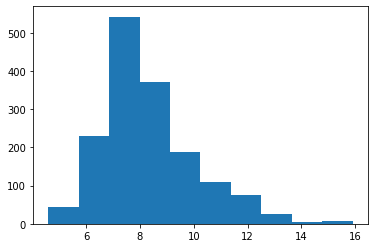

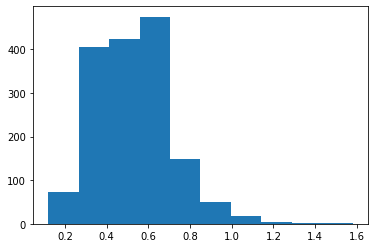

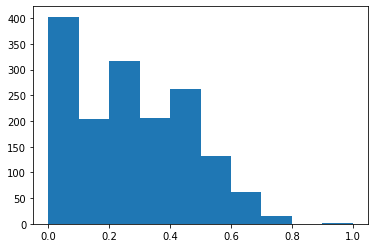

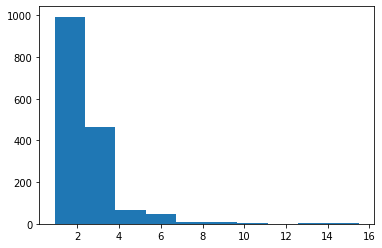

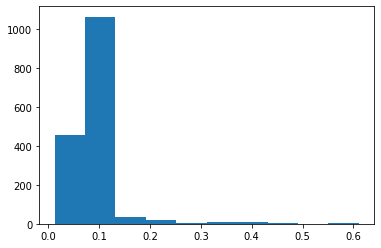

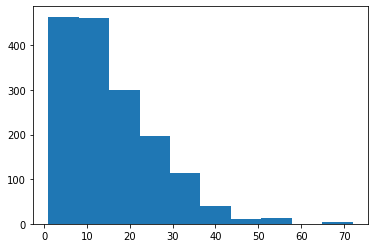

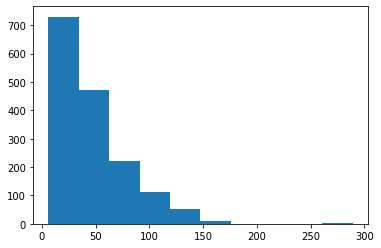

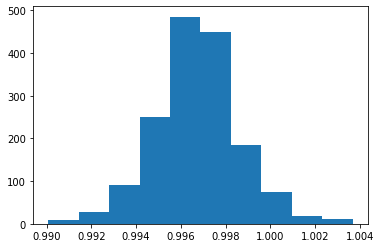

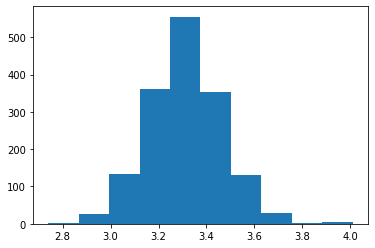

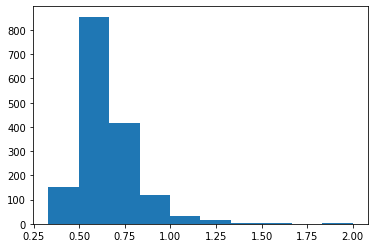

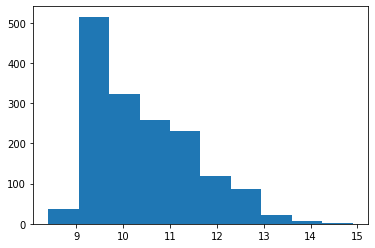

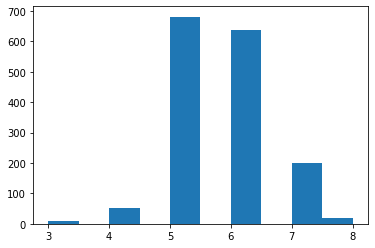

In [ ]:
for columna in df_red.columns:
  plt.hist(df_red[columna])
  plt.show()

In [ ]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


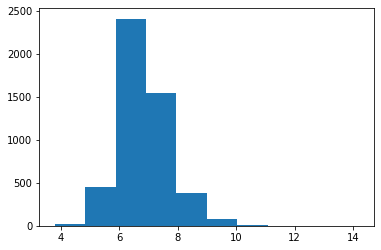

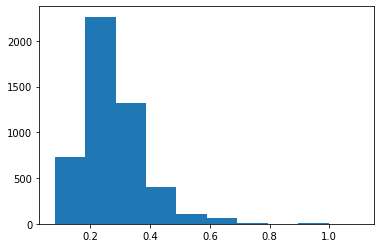

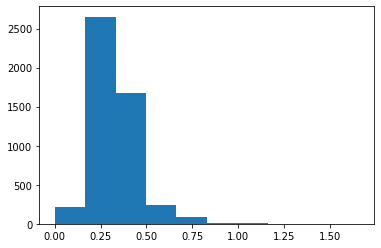

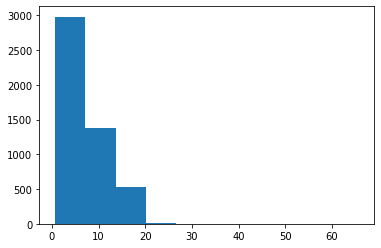

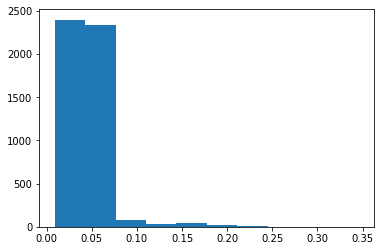

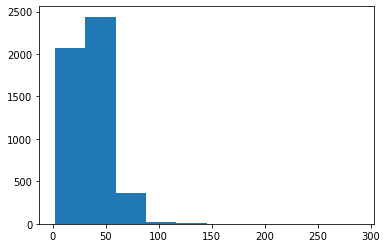

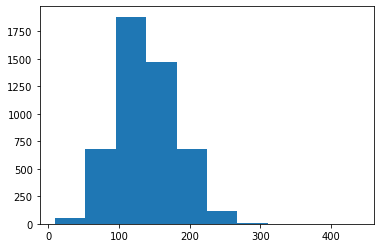

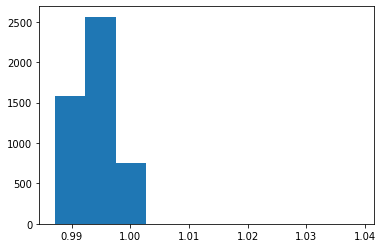

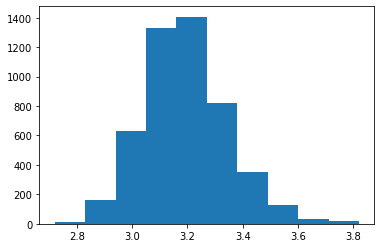

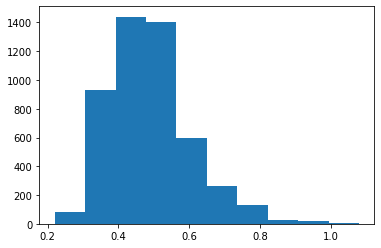

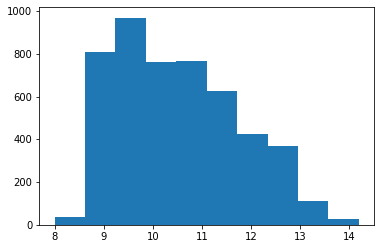

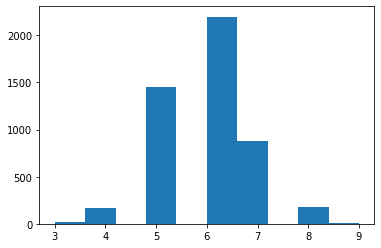

In [ ]:
for columna in df_white.columns:
  plt.hist(df_white[columna])
  plt.show()

In [ ]:
df_z_score_red=df_red.drop(columns=['quality'])
df_z_score_white=df_white.drop(columns=['quality'])

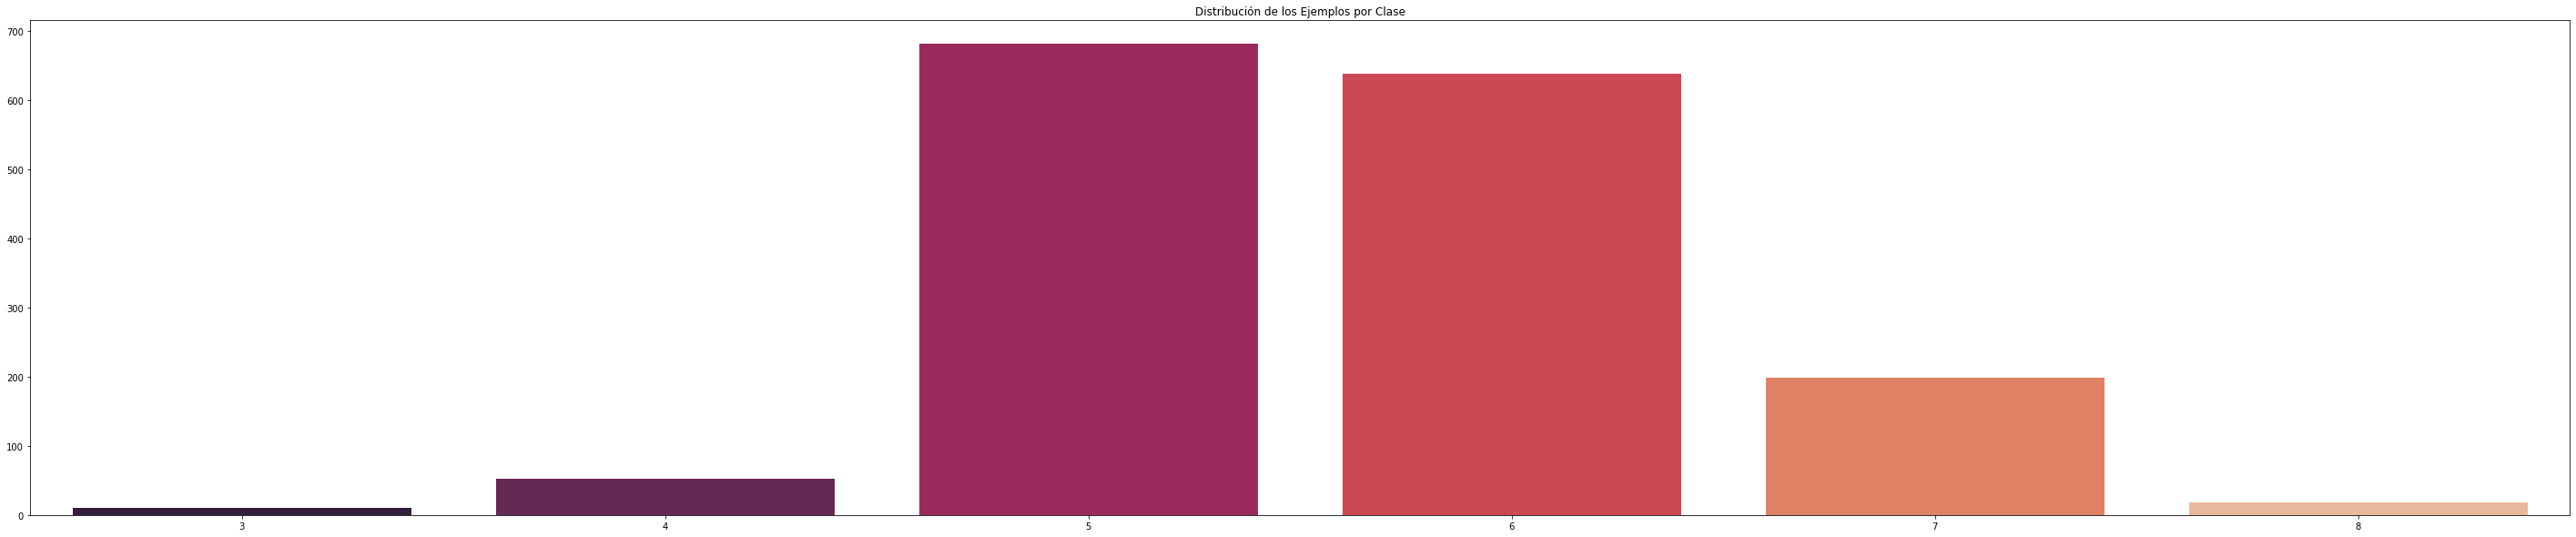

In [ ]:
clases, frecuencia = np.unique(df_red['quality'], return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

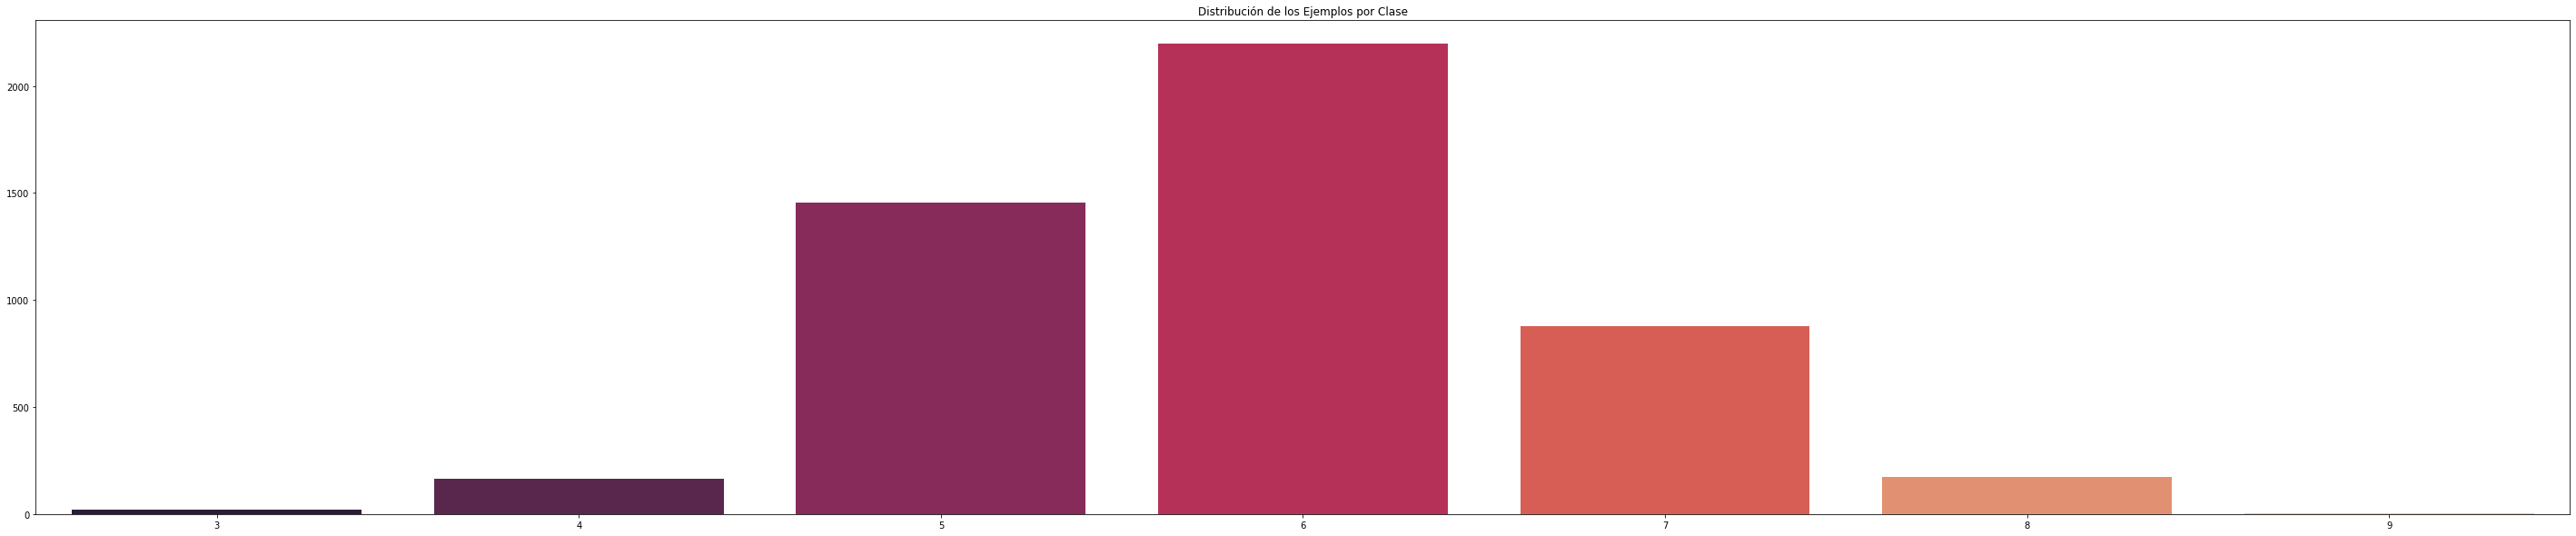

In [ ]:
clases, frecuencia = np.unique(df_white['quality'], return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

La fórmula conocida del Z-SCORE se implementa en código en el siguiente bloque. Como el Z-SCORE es proporcional a la correlación de cada columna, podemos omitir el término $\hat{\sigma}^2$. De esta forma solo tenemos que ordenar las columnas según el el z-score obtenido para cada una de ellas, y determinar las variables mas importantes para el modelo.

In [ ]:
def z_score(data,columna,y):
  return ((data[columna]-data[columna].mean())*(y-y.mean())).sum()/np.sqrt(((data[columna]-data[columna].mean())**2).sum())

In [ ]:
zscore_list_red=[]
for columna in df_z_score_red.columns:
  zscore_list_red.append(np.abs(z_score(df_z_score_red,columna,df_red['quality'])))

In [ ]:
zscore_list_white=[]
for columna in df_z_score_red.columns:
  zscore_list_white.append(np.abs(z_score(df_z_score_white,columna,df_white['quality'])))

In [ ]:
top_zscore_red=np.argsort(zscore_list_red)
top_zscore_white=np.argsort(zscore_list_white)

#Desarrollo

Experimentaremos con $K=1$

Vemos que la mayoría de las variables tienden a una distribución normal, por lo que podemos aplicar un StandardScaler. Procedemos a entrenar el modelo para $K=1,2,3,4,5$

Se usarán cuatro medidas de error para confirmar la hipótesis: MSE, $R^2$, MEAE, y MAE. 

In [ ]:
lista_mse_1_red=[]
lista_r2_1_red=[]
lista_mae_1_red=[]
lista_meae_1_red=[]
np.random.seed(1)
for indice in np.flip(top_zscore_red):
  model=LinearRegression()
  X_train,X_test,y_train,y_test=train_test_split(df_z_score_red.iloc[:,indice].values,df_red['quality'].values,test_size=0.2,random_state=1)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train.reshape(-1,1))
  X_test=scaler.transform(X_test.reshape(-1,1))
  model.fit(X_train,y_train)
  lista_mse_1_red.append(mean_squared_error(y_test,model.predict(X_test)))
  lista_r2_1_red.append(r2_score(y_test,model.predict(X_test)))
  lista_mae_1_red.append(mean_absolute_error(y_test,model.predict(X_test)))
  lista_meae_1_red.append(median_absolute_error(y_test,model.predict(X_test)))

In [ ]:
lista_mse_1_white=[]
lista_r2_1_white=[]
lista_mae_1_white=[]
lista_meae_1_white=[]
np.random.seed(1)
for indice in np.flip(top_zscore_white):
  model=LinearRegression()
  X_train,X_test,y_train,y_test=train_test_split(df_z_score_white.iloc[:,indice].values,df_white['quality'].values,test_size=0.2,random_state=1)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train.reshape(-1,1))
  X_test=scaler.transform(X_test.reshape(-1,1))
  model.fit(X_train,y_train)
  lista_mse_1_white.append(mean_squared_error(y_test,model.predict(X_test)))
  lista_r2_1_white.append(r2_score(y_test,model.predict(X_test)))
  lista_mae_1_white.append(mean_absolute_error(y_test,model.predict(X_test)))
  lista_meae_1_white.append(median_absolute_error(y_test,model.predict(X_test)))

Text(0.5, 1.0, 'MEAE K=1')

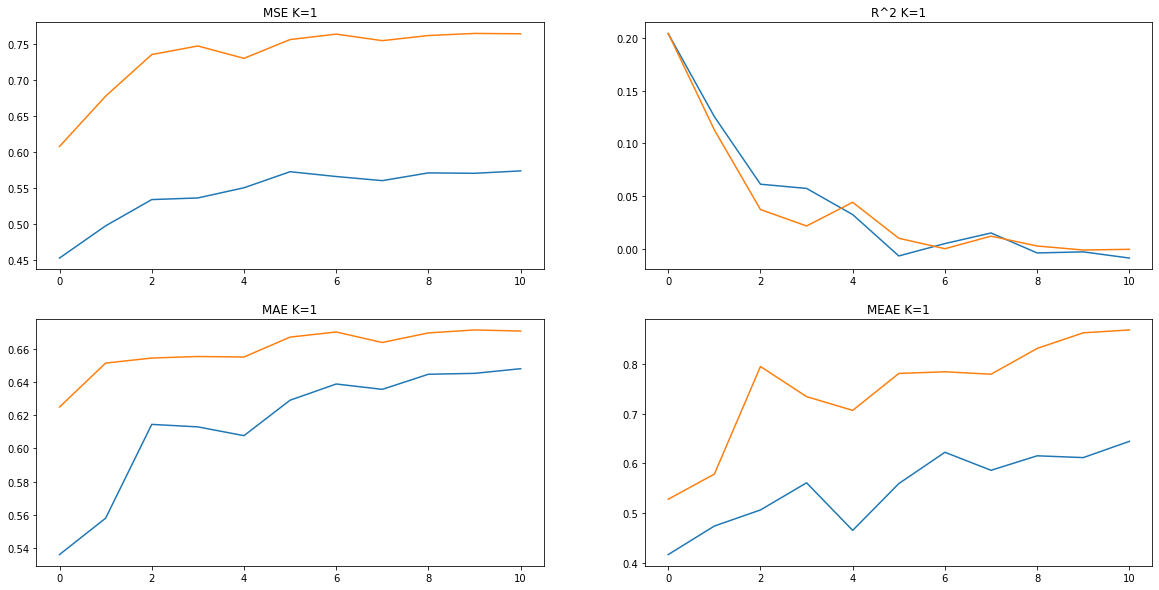

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
axs[0, 0].plot(lista_mse_1_red)
axs[0, 0].plot(lista_mse_1_white)
axs[0, 0].set_title("MSE K=1")
axs[0, 1].plot(lista_r2_1_red)
axs[0, 1].plot(lista_r2_1_white)
axs[0, 1].set_title("R^2 K=1")
axs[1, 0].plot(lista_mae_1_red)
axs[1, 0].plot(lista_mae_1_white)
axs[1, 0].set_title("MAE K=1")
axs[1, 1].plot(lista_meae_1_red)
axs[1, 1].plot(lista_meae_1_white)
axs[1, 1].set_title("MEAE K=1")

Ahora con $K=2$

In [ ]:
lista_mse_2_red=[]
lista_r2_2_red=[]
lista_mae_2_red=[]
lista_meae_2_red=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_red))):
  if i!=10:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_red.iloc[:,[np.flip(top_zscore_red)[i],np.flip(top_zscore_red)[i+1]]].values,df_red['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_2_red.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_2_red.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_2_red.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_2_red.append(median_absolute_error(y_test,model.predict(X_test)))

In [ ]:
lista_mse_2_white=[]
lista_r2_2_white=[]
lista_mae_2_white=[]
lista_meae_2_white=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_white))):
  if i<10:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_white.iloc[:,[np.flip(top_zscore_white)[i],np.flip(top_zscore_white)[i+1]]].values,df_white['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_2_white.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_2_white.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_2_white.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_2_white.append(median_absolute_error(y_test,model.predict(X_test)))

Text(0.5, 1.0, 'MEAE K=2')

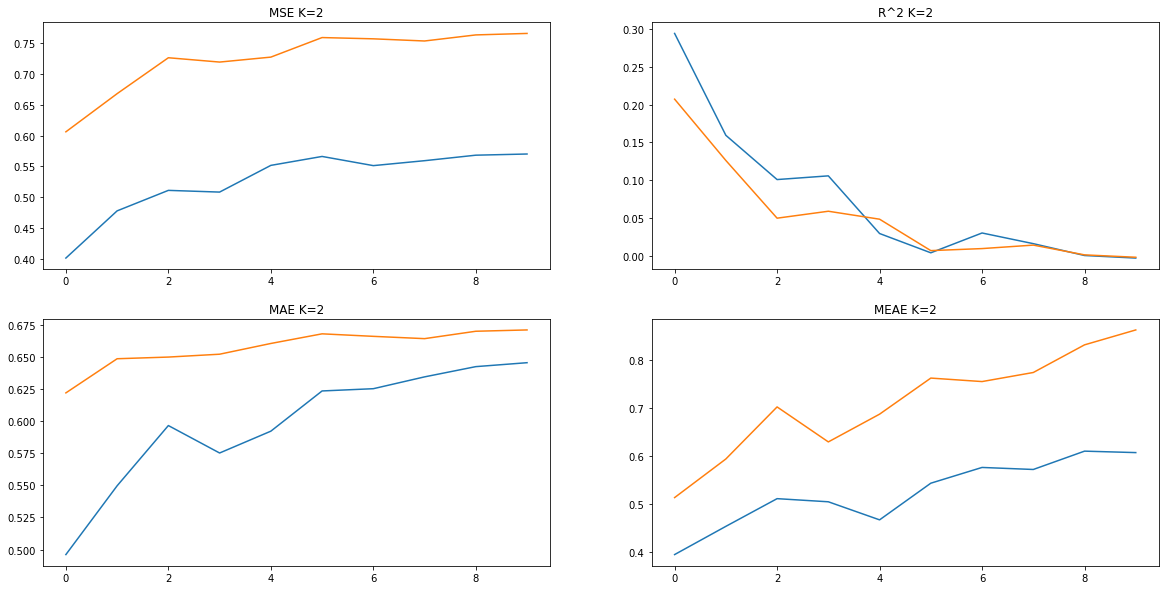

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
axs[0, 0].plot(lista_mse_2_red)
axs[0, 0].plot(lista_mse_2_white)
axs[0, 0].set_title("MSE K=2")
axs[0, 1].plot(lista_r2_2_red)
axs[0, 1].plot(lista_r2_2_white)
axs[0, 1].set_title("R^2 K=2")
axs[1, 0].plot(lista_mae_2_red)
axs[1, 0].plot(lista_mae_2_white)
axs[1, 0].set_title("MAE K=2")
axs[1, 1].plot(lista_meae_2_red)
axs[1, 1].plot(lista_meae_2_white)
axs[1, 1].set_title("MEAE K=2")

Vemos que para valores más grandes de z-score el mse es más pequeño

Ahora con $K=3$

In [ ]:
lista_mse_3_red=[]
lista_r2_3_red=[]
lista_mae_3_red=[]
lista_meae_3_red=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_red))):
  if i<9:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_red.iloc[:,[np.flip(top_zscore_red)[i],np.flip(top_zscore_red)[i+1],np.flip(top_zscore_red)[i+2]]].values,df_red['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_3_red.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_3_red.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_3_red.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_3_red.append(median_absolute_error(y_test,model.predict(X_test)))

In [ ]:
lista_mse_3_white=[]
lista_r2_3_white=[]
lista_mae_3_white=[]
lista_meae_3_white=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_white))):
  if i<9:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_white.iloc[:,[np.flip(top_zscore_white)[i],np.flip(top_zscore_white)[i+1],np.flip(top_zscore_white)[i+2]]].values,df_white['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_3_white.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_3_white.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_3_white.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_3_white.append(median_absolute_error(y_test,model.predict(X_test)))

Text(0.5, 1.0, 'MEAE K=3')

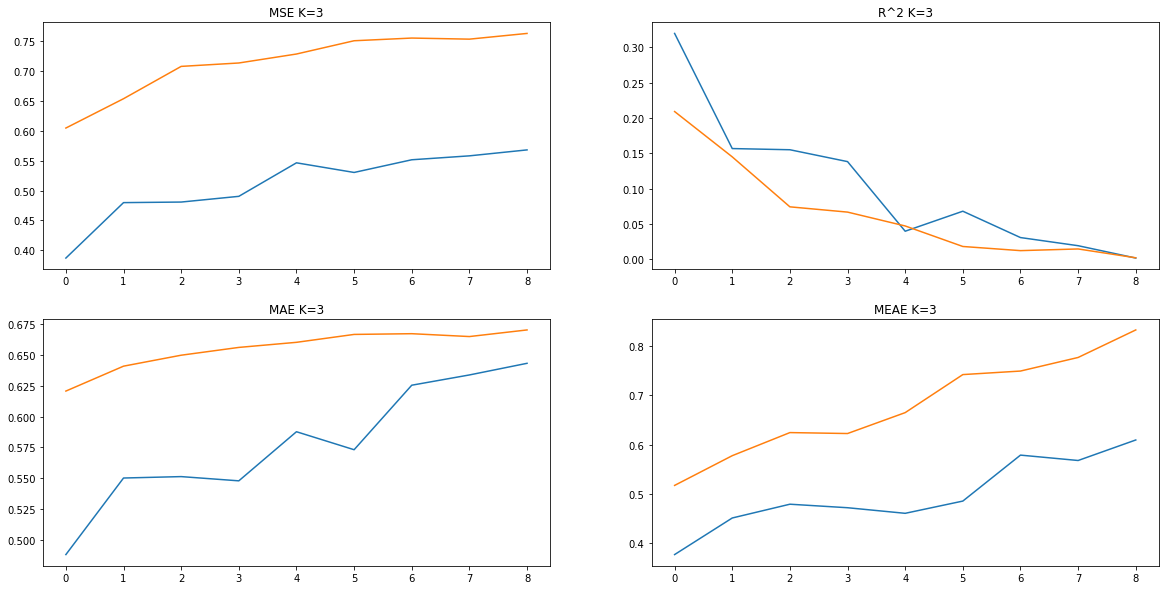

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
axs[0, 0].plot(lista_mse_3_red)
axs[0, 0].plot(lista_mse_3_white)
axs[0, 0].set_title("MSE K=3")
axs[0, 1].plot(lista_r2_3_red)
axs[0, 1].plot(lista_r2_3_white)
axs[0, 1].set_title("R^2 K=3")
axs[1, 0].plot(lista_mae_3_red)
axs[1, 0].plot(lista_mae_3_white)
axs[1, 0].set_title("MAE K=3")
axs[1, 1].plot(lista_meae_3_red)
axs[1, 1].plot(lista_meae_3_white)
axs[1, 1].set_title("MEAE K=3")

Ahora con $K=4$

In [ ]:
lista_mse_4_red=[]
lista_r2_4_red=[]
lista_mae_4_red=[]
lista_meae_4_red=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_red))):
  if i<8:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_red.iloc[:,[np.flip(top_zscore_red)[i],np.flip(top_zscore_red)[i+1],np.flip(top_zscore_red)[i+2],np.flip(top_zscore_red)[i+3]]].values,df_red['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_4_red.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_4_red.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_4_red.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_4_red.append(median_absolute_error(y_test,model.predict(X_test)))

In [ ]:
lista_mse_4_white=[]
lista_r2_4_white=[]
lista_mae_4_white=[]
lista_meae_4_white=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_white))):
  if i<8:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_white.iloc[:,[np.flip(top_zscore_white)[i],np.flip(top_zscore_white)[i+1],np.flip(top_zscore_white)[i+2],np.flip(top_zscore_white)[i+3]]].values,df_white['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_4_white.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_4_white.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_4_white.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_4_white.append(median_absolute_error(y_test,model.predict(X_test)))

Text(0.5, 1.0, 'MEAE K=4')

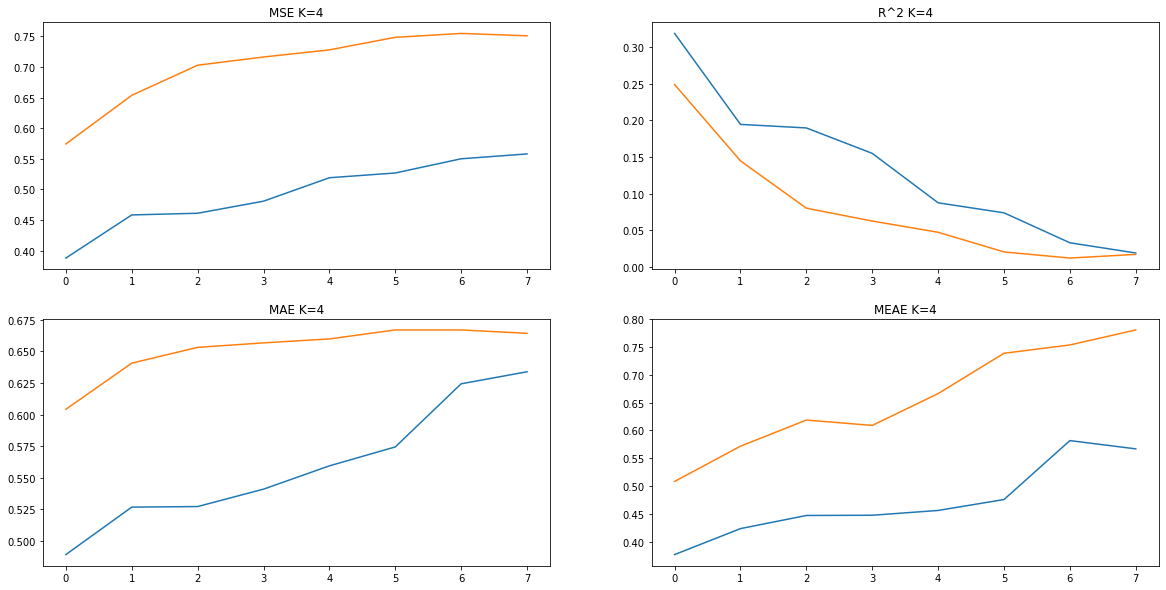

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
axs[0, 0].plot(lista_mse_4_red)
axs[0, 0].plot(lista_mse_4_white)
axs[0, 0].set_title("MSE K=4")
axs[0, 1].plot(lista_r2_4_red)
axs[0, 1].plot(lista_r2_4_white)
axs[0, 1].set_title("R^2 K=4")
axs[1, 0].plot(lista_mae_4_red)
axs[1, 0].plot(lista_mae_4_white)
axs[1, 0].set_title("MAE K=4")
axs[1, 1].plot(lista_meae_4_red)
axs[1, 1].plot(lista_meae_4_white)
axs[1, 1].set_title("MEAE K=4")

Ahora con $K=5$

In [ ]:
lista_mse_5_red=[]
lista_r2_5_red=[]
lista_mae_5_red=[]
lista_meae_5_red=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_red))):
  if i<7:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_red.iloc[:,[np.flip(top_zscore_red)[i],np.flip(top_zscore_red)[i+1],np.flip(top_zscore_red)[i+2],np.flip(top_zscore_red)[i+3],np.flip(top_zscore_red)[i+4]]].values,df_red['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_5_red.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_5_red.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_5_red.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_5_red.append(median_absolute_error(y_test,model.predict(X_test)))

In [ ]:
lista_mse_5_white=[]
lista_r2_5_white=[]
lista_mae_5_white=[]
lista_meae_5_white=[]
np.random.seed(1)
for i in range(len(np.flip(top_zscore_white))):
  if i<7:
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(df_z_score_white.iloc[:,[np.flip(top_zscore_white)[i],np.flip(top_zscore_white)[i+1],np.flip(top_zscore_white)[i+2],np.flip(top_zscore_white)[i+3],np.flip(top_zscore_white)[i+4]]].values,df_white['quality'].values,test_size=0.2,random_state=1)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    model.fit(X_train,y_train)
    lista_mse_5_white.append(mean_squared_error(y_test,model.predict(X_test)))
    lista_r2_5_white.append(r2_score(y_test,model.predict(X_test)))
    lista_mae_5_white.append(mean_absolute_error(y_test,model.predict(X_test)))
    lista_meae_5_white.append(median_absolute_error(y_test,model.predict(X_test)))

Text(0.5, 1.0, 'MEAE K=5')

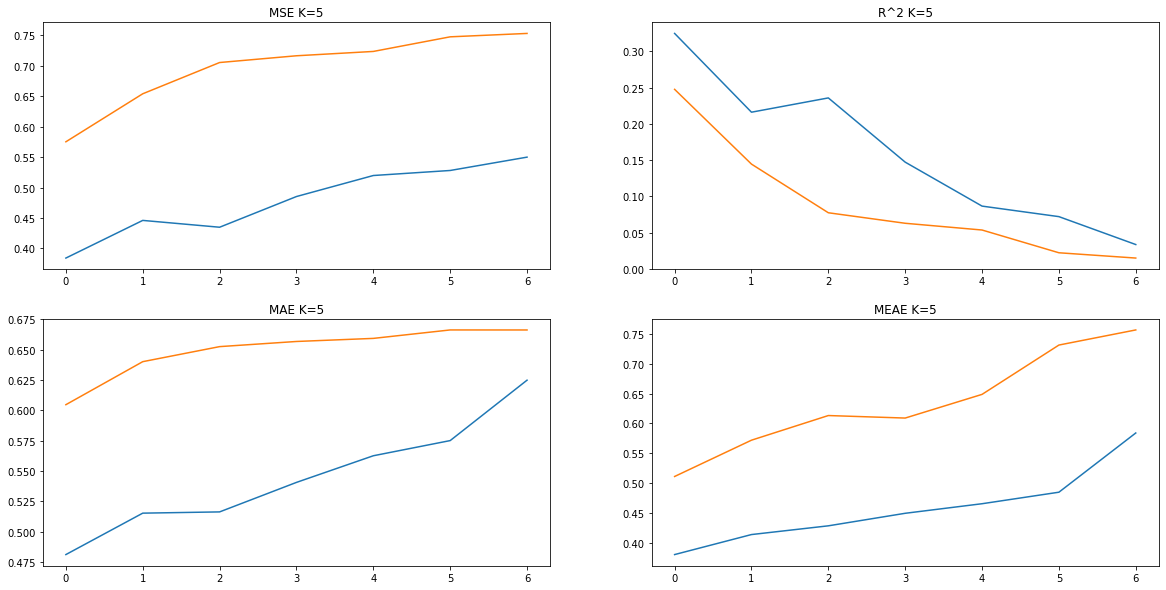

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
axs[0, 0].plot(lista_mse_5_red)
axs[0, 0].plot(lista_mse_5_white)
axs[0, 0].set_title("MSE K=5")
axs[0, 1].plot(lista_r2_5_red)
axs[0, 1].plot(lista_r2_5_white)
axs[0, 1].set_title("R^2 K=5")
axs[1, 0].plot(lista_mae_5_red)
axs[1, 0].plot(lista_mae_5_white)
axs[1, 0].set_title("MAE K=5")
axs[1, 1].plot(lista_meae_5_red)
axs[1, 1].plot(lista_meae_5_white)
axs[1, 1].set_title("MEAE K=5")

#Resultados

Comparamos df_red de 1 a 5 variables

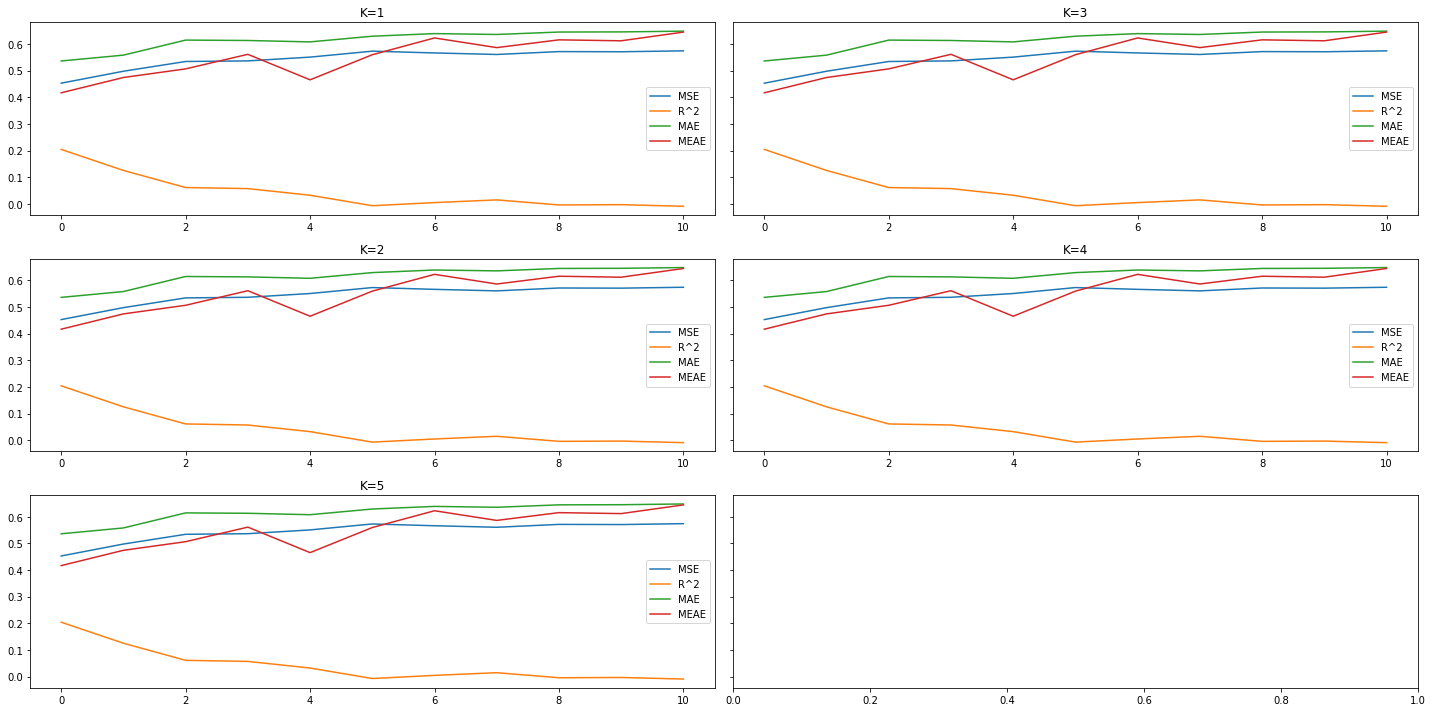

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(20, 10),sharey=True)
axs[0, 0].plot(lista_mse_1_red,label='MSE')
axs[0, 0].plot(lista_r2_1_red,label='R^2')
axs[0, 0].plot(lista_mae_1_red,label='MAE')
axs[0, 0].plot(lista_meae_1_red,label='MEAE')
axs[0,0].legend()
axs[0, 0].set_title("K=1")
axs[1, 0].plot(lista_mse_1_red,label='MSE')
axs[1, 0].plot(lista_r2_1_red,label='R^2')
axs[1, 0].plot(lista_mae_1_red,label='MAE')
axs[1, 0].plot(lista_meae_1_red,label='MEAE')
axs[1,0].legend()
axs[1, 0].set_title("K=2")
axs[0, 1].plot(lista_mse_1_red,label='MSE')
axs[0, 1].plot(lista_r2_1_red,label='R^2')
axs[0, 1].plot(lista_mae_1_red,label='MAE')
axs[0, 1].plot(lista_meae_1_red,label='MEAE')
axs[0,1].legend()
axs[0, 1].set_title("K=3")
axs[1,1].plot(lista_mse_1_red,label='MSE')
axs[1,1].plot(lista_r2_1_red,label='R^2')
axs[1,1].plot(lista_mae_1_red,label='MAE')
axs[1,1].plot(lista_meae_1_red,label='MEAE')
axs[1, 1].set_title("K=4")
axs[1,1].legend()
axs[2, 0].plot(lista_mse_1_red,label='MSE')
axs[2, 0].plot(lista_r2_1_red,label='R^2')
axs[2, 0].plot(lista_mae_1_red,label='MAE')
axs[2, 0].plot(lista_meae_1_red,label='MEAE')
axs[2, 0].set_title("K=5")
axs[2,0].legend()
fig.tight_layout()

Comparamos df_red de 1 a 5 variables

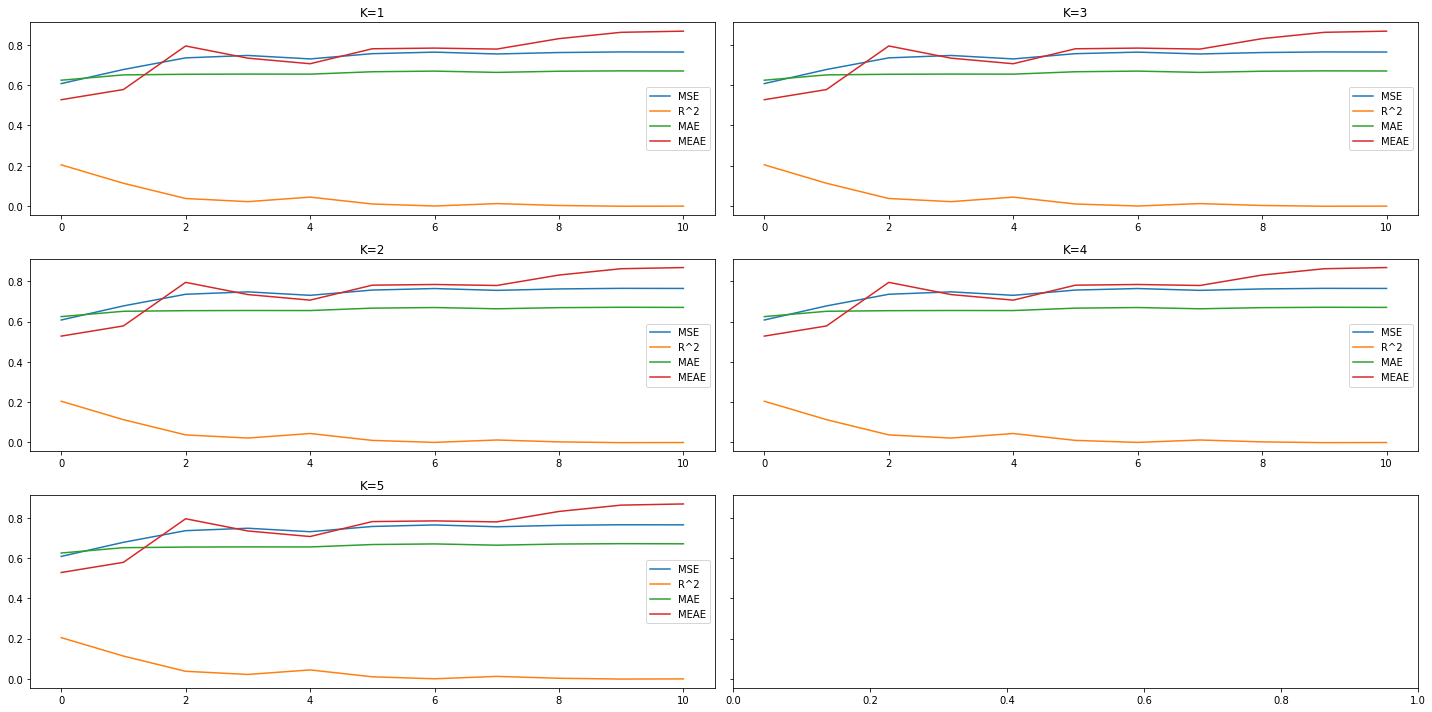

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(20, 10),sharey=True)
axs[0, 0].plot(lista_mse_1_white,label='MSE')
axs[0, 0].plot(lista_r2_1_white,label='R^2')
axs[0, 0].plot(lista_mae_1_white,label='MAE')
axs[0, 0].plot(lista_meae_1_white,label='MEAE')
axs[0,0].legend()
axs[0, 0].set_title("K=1")
axs[1, 0].plot(lista_mse_1_white,label='MSE')
axs[1, 0].plot(lista_r2_1_white,label='R^2')
axs[1, 0].plot(lista_mae_1_white,label='MAE')
axs[1, 0].plot(lista_meae_1_white,label='MEAE')
axs[1,0].legend()
axs[1, 0].set_title("K=2")
axs[0, 1].plot(lista_mse_1_white,label='MSE')
axs[0, 1].plot(lista_r2_1_white,label='R^2')
axs[0, 1].plot(lista_mae_1_white,label='MAE')
axs[0, 1].plot(lista_meae_1_white,label='MEAE')
axs[0,1].legend()
axs[0, 1].set_title("K=3")
axs[1,1].plot(lista_mse_1_white,label='MSE')
axs[1,1].plot(lista_r2_1_white,label='R^2')
axs[1,1].plot(lista_mae_1_white,label='MAE')
axs[1,1].plot(lista_meae_1_white,label='MEAE')
axs[1, 1].set_title("K=4")
axs[1,1].legend()
axs[2, 0].plot(lista_mse_1_white,label='MSE')
axs[2, 0].plot(lista_r2_1_white,label='R^2')
axs[2, 0].plot(lista_mae_1_white,label='MAE')
axs[2, 0].plot(lista_meae_1_white,label='MEAE')
axs[2, 0].set_title("K=5")
axs[2,0].legend()
fig.tight_layout()

#Conclusiones

Para este taller, se realizó un análisis sobre el efecto que tiene el uso del Z-SCORE para el filtrado de variables y su efecto en el error de predicción. 
Con este objetivo, se prepararon dos datasets para predecir calidad de vinos utilizando regresión lineal, con el único preprocesamiento siendo un StandardScaler en los atributos.

Se demostró empíricamente mediante 4 métricas de erros distintas  que los atributos seleccionados con el mejor Z-SCORE minimizan los errores de predicción.

Con todo, se concluye que los resultados obtenidos confirman la hipótesis.